In [1]:
# Install qiskit library
%pip install qiskit
# Install pylatex in order to make the plots work
%pip install pylatexenc



# Import numpy, matplotlib, qiskit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.visualization import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *

import random
from math import *

SPIN_DOWN = [1,0]
SPIN_UP = [0,1]

def switch_spin(spin):
  if SPIN_UP == spin:
    return SPIN_DOWN
  else:
    return SPIN_UP

     |████████████████████████████████| 6.1 MB 27.7 MB/s 
     |████████████████████████████████| 17.9 MB 109 kB/s 
     |████████████████████████████████| 236 kB 70.3 MB/s 
     |████████████████████████████████| 207 kB 70.3 MB/s 
     |████████████████████████████████| 2.1 MB 39.5 MB/s 
     |████████████████████████████████| 1.4 MB 35.3 MB/s 
     |████████████████████████████████| 634 kB 67.3 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
     |████████████████████████████████| 943 kB 54.2 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 3.5 MB 44.0 MB/s 
     |████████████████████████████████| 6.3 MB 42.1 MB/s 
  Created wheel for qiskit: filename=qiskit-0.31.0-py3-none-any.whl size=11728 sha256=9799b5e0a727c018ef290b3f88d6e0f286c066d45cce39cd20d3f197b268e17b
  Stored in directory: /root/.cache/pip/wheels/29/dd/b2/1fe1a9ac92aaf75b267d893ae27329ea229f292a2930

In [26]:
# Create quantum and classical registers (i.e., the qubits and the bits)

Channel = ClassicalRegister(1, 'b')



def Circuit_magnetic_field(S,A,B,P1,P2,P3,P4):

  """
  S = switch_spin(S)
  A = switch_spin(A)
  B = switch_spin(B)
  P = switch_spin(P)
  """
  circ = QuantumCircuit(9, 1) 
 
  circ.initialize(S, 0)
  circ.initialize(A,1)
  circ.initialize(B,2)
  circ.initialize(SPIN_DOWN, 3)
  circ.initialize(SPIN_DOWN, 4)
  
  circ.initialize(P1,5)
  circ.initialize(P2,6)
  circ.initialize(P3,7)
  circ.initialize(P4,8)
  
  
  circ.mcx([0,1,2],3)
  
  
  circ.x(0)
  circ.x(1)
  circ.x(2)
  circ.mcx([0,1,2],3)
  circ.x(0)
  circ.x(1)
  circ.x(2)
  circ.barrier()
  ######
  circ.x(1)
  circ.mcx([0,1,2], 4)
  circ.x(1)
  circ.x(2)
  circ.mcx([0,1,2], 4)
  circ.x(2)
  circ.barrier()
  ######
  circ.x(2)
  circ.mcx([2,3,5],0)
  circ.x(2)
  circ.mcx([2,3,8],0)

  circ.barrier()
  ######

  circ.mcx([4,7], 0)

  circ.x(1)
  circ.x(2)
  circ.x(3)
  circ.mcx([1,2,3,6], 0)
  circ.x(1)
  circ.x(2)
  circ.x(3)
  circ.barrier()
  ######
  
  circ.x(3)
  circ.x(4)
  circ.mcx([2,3,4],0)
  circ.x(3)
  circ.x(4)
  circ.barrier()
  
  ######

  circ.x(3)
  circ.x(4)
  circ.mcx([2,3,4],0)
  circ.x(3)
  circ.x(4)

  circ.x(3)
  circ.x(4)
  circ.mcx([1,3,4],0)
  circ.x(3)
  circ.x(4) 


  circ.barrier()
  ######
  circ.measure(0, 0)
  return circ

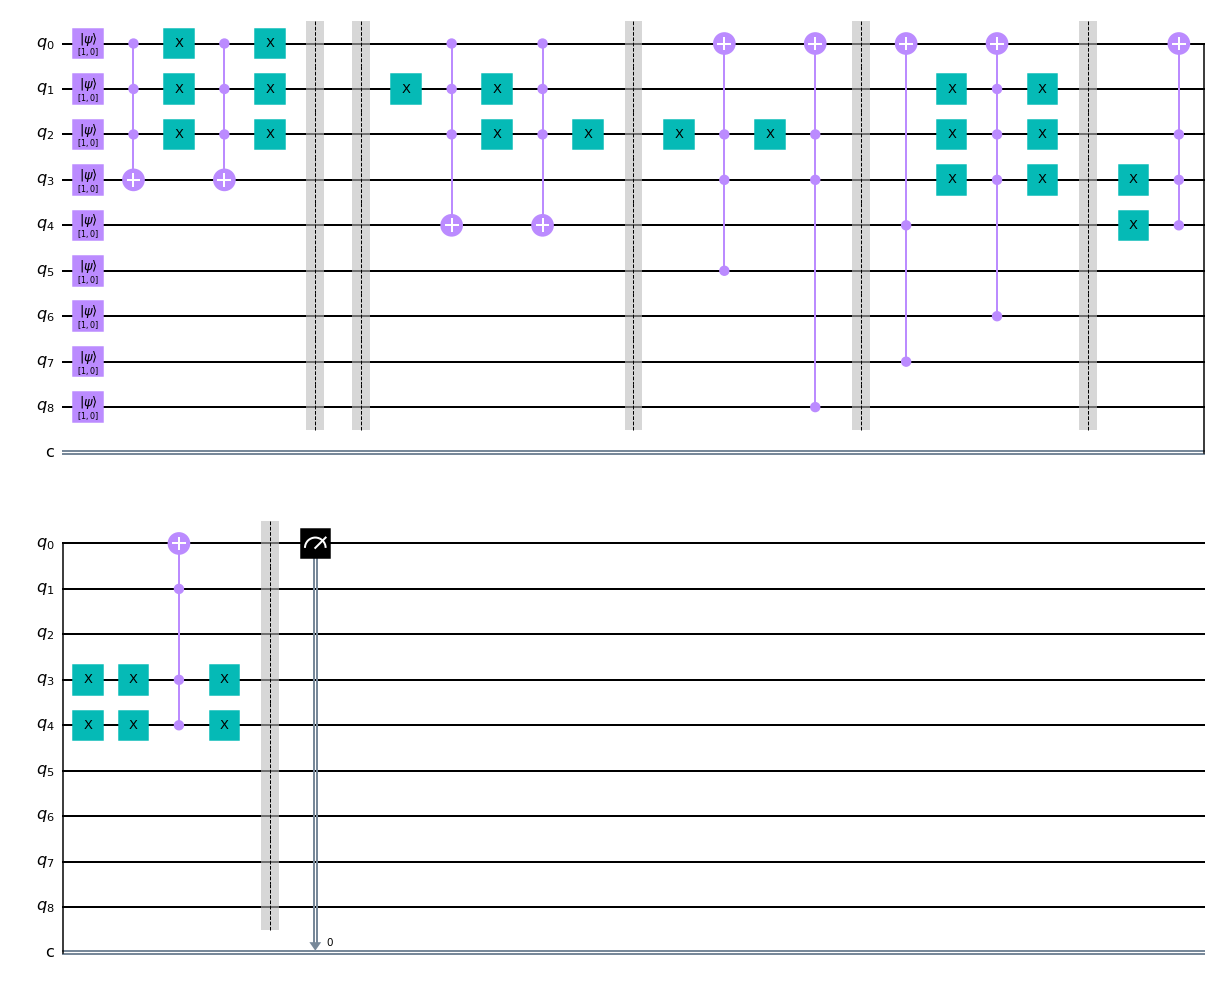

In [24]:
circ = Circuit_magnetic_field(SPIN_DOWN, SPIN_DOWN, SPIN_DOWN, SPIN_DOWN, SPIN_DOWN, SPIN_DOWN, SPIN_DOWN )
circ.draw(output = "mpl")

In [27]:
P1 = 0.1
P1 = [sqrt(1-P1), sqrt(P1)]
P2 = 0.2
P2 = [sqrt(1-P2), sqrt(P2)]
P3 = 0.3
P3 = [sqrt(1-P3), sqrt(P3)]
P4 = 0.4
P4 = [sqrt(1-P4), sqrt(P4)]

def vec_to_s(x):
  if x == [0,1]:
    return "UP"
  if x == [1,0]:
    return "DOWN"

for S in [SPIN_DOWN,SPIN_UP]:
  for A in [SPIN_DOWN,SPIN_UP]:
    for B in [SPIN_DOWN,SPIN_UP]:
      circ0 = Circuit_magnetic_field(S,A,B,P1,P2,P3,P4)
      backend = BasicAer.get_backend('qasm_simulator') # the device to run on
      result = execute(circ0, backend, shots=10000).result().get_counts()
      if not "0" in result:
        resP = 0
      elif not "1" in result:
        resP = 1
      else:
        resP = result["0"]/(result["0"]+result["1"])
      #print(result)
      print("A:", vec_to_s(A), "S:", vec_to_s(S), "B", vec_to_s(B), "P(0)=", resP)

A: DOWN S: DOWN B DOWN P(0)= 0.9038
A: DOWN S: DOWN B UP P(0)= 1
A: UP S: DOWN B DOWN P(0)= 0
A: UP S: DOWN B UP P(0)= 0
A: DOWN S: UP B DOWN P(0)= 0.201
A: DOWN S: UP B UP P(0)= 0.2997
A: UP S: UP B DOWN P(0)= 0.3035
A: UP S: UP B UP P(0)= 0.4008
